In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score
import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle/input\australia-weather-data\Weather Test Data.csv
kaggle/input\australia-weather-data\Weather Training Data.csv


# Prepare Data

In [2]:
df_train = pd.read_csv('kaggle/input/australia-weather-data/Weather Training Data.csv')
df_test = pd.read_csv('kaggle/input/australia-weather-data/Weather Test Data.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(99516, 23)
(42677, 22)


In [4]:
df_train

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


In [5]:
X = df_train.drop(columns=['RainTomorrow'])
y = df_train['RainTomorrow']
df = pd.concat([X, df_test], axis=0)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


# Data cleaning

In [7]:
# Bỏ cột row ID
df.drop(columns='row ID', inplace=True)

In [8]:
# Tính phần trăm thiếu dữ liệu của mỗi cột
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


In [9]:
df.drop(columns=['Sunshine', 'Evaporation'], inplace=True)

In [10]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

**Fill null values**

**Điền giá trị null có kiểu "object" bằng giá trị xuất hiện nhiều nhất"**

In [11]:
# chọn các cột trong dataframe df có kiểu dữ liệu là "object"
categorical = df.select_dtypes(include = "object").columns
# ColumnTransformer: áp dụng các phép biến đổi thay thế giá trị null bằng giá trị xuất hiện nhiều nhất
cleaner = ColumnTransformer([
    ('categorical_transformer', SimpleImputer(strategy='most_frequent'), categorical)
])
# Chọn các cột phân loại từ [categorical] 
# Phương thức fit của ColumnTransformer được sử dụng để học các tham số cần thiết cho phép biến đổi 
# Phương thức transform của ColumnTransformer được sử dụng để áp dụng phép biến đổi đã học lên dữ liệu df[categorical]
df[categorical] = cleaner.fit_transform(df[categorical])

In [12]:
# Đếm số lượng dữ liệu thiếu trong dataframe
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

**Điền giá trị null bằng trung vị (median)**

In [13]:
numerical = df.select_dtypes(include = "float64").columns
cleaner = ColumnTransformer([
    ('numerical_transformer', SimpleImputer(strategy='median'), numerical)
])
df[numerical] = cleaner.fit_transform(df[numerical])

In [14]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

**Xem lại giá trị của feature categorical**

In [15]:
categorical = df.select_dtypes(include = "object").columns
for i in range(len(categorical)):
    print(df[categorical[i]].value_counts())
    print('************************************\n')

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [16]:
numerical = df.select_dtypes(include = "float64").columns
for i in range(len(numerical)):
    print(df[numerical[i]].value_counts())
    print('************************************\n')

MinTemp
 12.0    1487
 11.0     883
 9.6      883
 10.2     880
 10.5     867
         ... 
 30.5       1
-7.3        1
-7.8        1
-7.2        1
 31.0       1
Name: count, Length: 389, dtype: int64
************************************

MaxTemp
 22.6    1049
 20.0     871
 19.8     829
 19.0     827
 20.4     820
         ... 
-4.1        1
 0.7        1
-3.7        1
-2.9        1
-4.8        1
Name: count, Length: 505, dtype: int64
************************************

Rainfall
0.0      91681
0.2       8685
0.4       3750
0.6       2562
0.8       2028
         ...  
86.2         1
208.5        1
93.4         1
79.6         1
117.6        1
Name: count, Length: 679, dtype: int64
************************************

WindGustSpeed
39.0     17926
35.0      9070
31.0      8310
37.0      7903
33.0      7814
         ...  
126.0        2
124.0        2
122.0        2
130.0        1
6.0          1
Name: count, Length: 67, dtype: int64
************************************

WindSpeed9am
13.

**Convert values form categorical to numrical values**

In [17]:
objects = df.select_dtypes(include = "object").columns
for i in range(len(objects)):
    df[objects[i]] = LabelEncoder().fit_transform(df[objects[i]])

In [18]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
3,2,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0
4,2,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,41,2.4,19.1,0.0,0,33.0,9,0,17.0,17.0,59.0,24.0,1030.0,1026.2,5.0,5.0,8.0,18.8,0
42673,41,2.3,21.4,0.0,9,22.0,9,10,11.0,7.0,60.0,28.0,1026.9,1022.8,5.0,5.0,8.9,20.3,0
42674,41,2.6,22.5,0.0,8,19.0,8,0,9.0,7.0,59.0,24.0,1025.0,1021.4,5.0,5.0,8.8,22.1,0
42675,41,7.4,20.6,0.0,0,35.0,2,0,15.0,17.0,63.0,33.0,1027.2,1023.3,5.0,5.0,11.0,20.3,0


In [19]:
# DataFrame gốc df thành hai tập dữ liệu: 
# tập dữ liệu huấn luyện train (99516 hàng đầu tiên) và tập dữ liệu thử nghiệm test (42677 hàng cuối cùng).
train = df.iloc[:99516,:]
# Danh sách chứa hai DataFrame: train (tập dữ liệu huấn luyện) và y (nhãn mục tiêu)
new_train = pd.concat([train, y], axis=1)
test = df.iloc[99516:, :]

In [20]:
new_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
3,2,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
4,2,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,41,8.0,20.7,0.0,2,41.0,9,0,19.0,26.0,56.0,32.0,1028.1,1024.3,5.0,7.0,11.6,20.0,0,0
99512,41,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
99513,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
99514,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0


# Visualize for some important features

**Sự tương quan giữa các feature**

<Axes: >

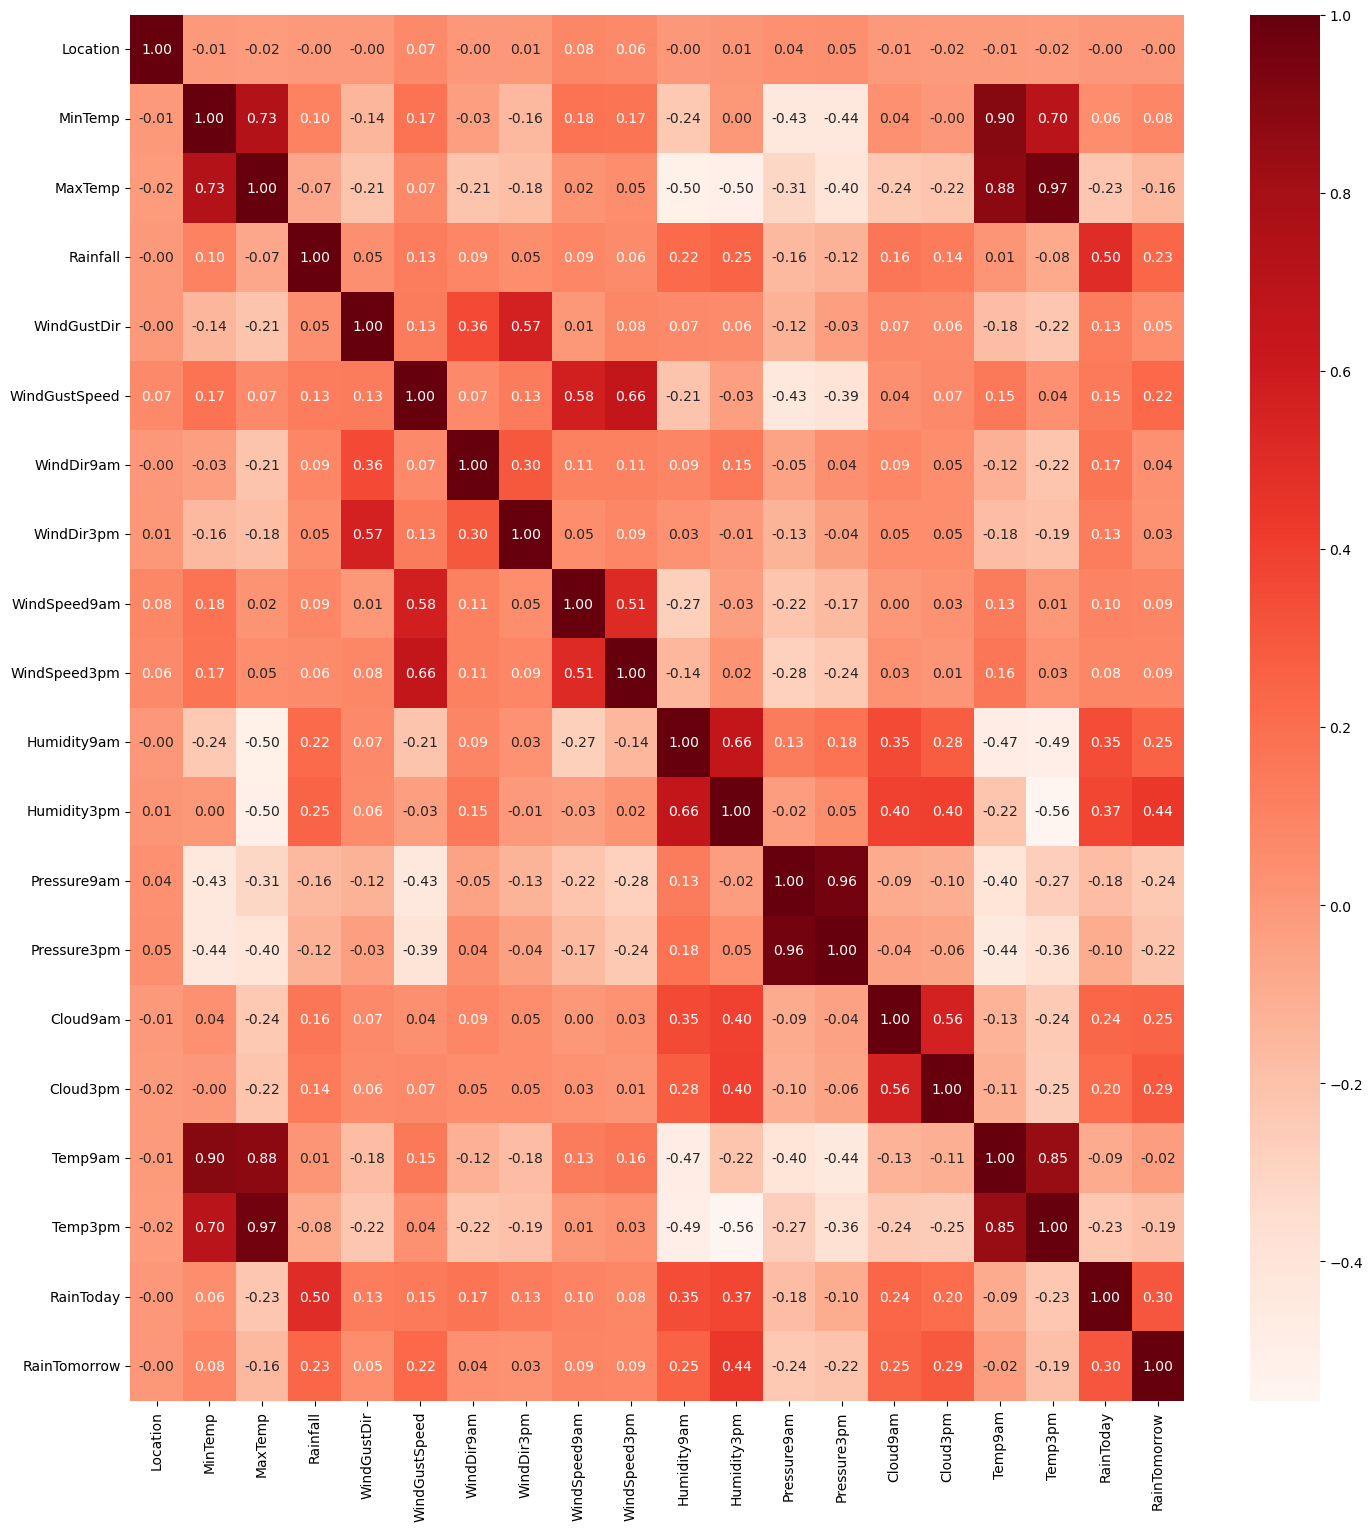

In [21]:
plt.figure(figsize=(17,18))
cor = new_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

<Axes: xlabel='Humidity9am', ylabel='Count'>

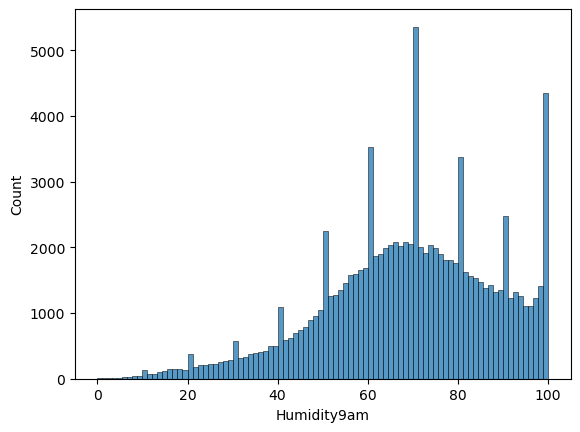

In [22]:
sns.histplot(new_train['Humidity9am'])

<Axes: xlabel='Humidity3pm', ylabel='Count'>

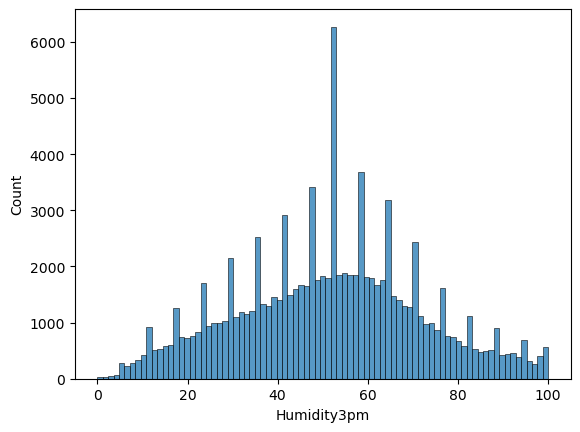

In [23]:
sns.histplot(new_train['Humidity3pm'])

<Axes: xlabel='Cloud9am'>

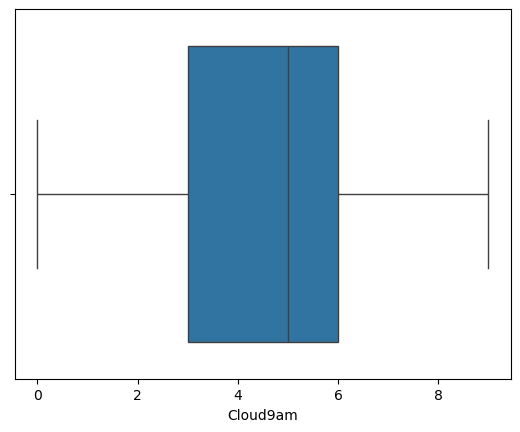

In [24]:
sns.boxplot(x=new_train['Cloud9am'])

<Axes: xlabel='Cloud3pm'>

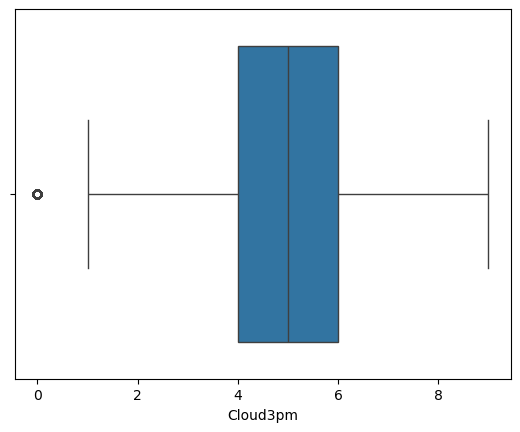

In [25]:
sns.boxplot(x=new_train['Cloud3pm'])

<Axes: xlabel='RainToday', ylabel='count'>

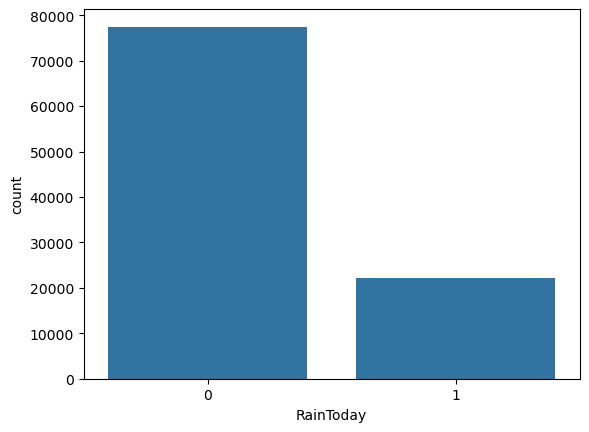

In [26]:
sns.countplot(x=new_train['RainToday'])

In [27]:
new_train['RainToday'].value_counts()

RainToday
0    77460
1    22056
Name: count, dtype: int64

RainTomorrow
0    77157
1    22359
Name: count, dtype: int64

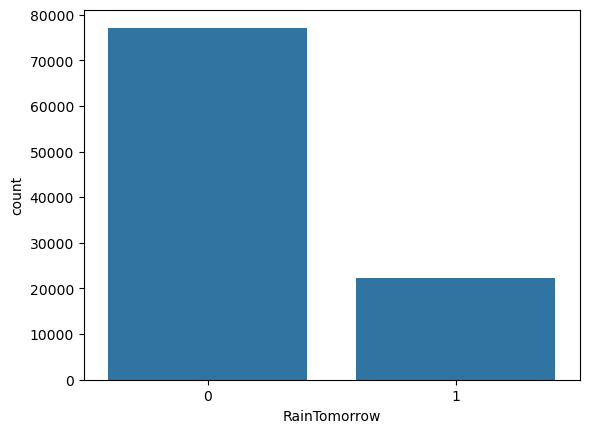

In [28]:
sns.countplot(x=new_train['RainTomorrow'])
new_train['RainTomorrow'].value_counts()

# Balancing dataset

In [29]:
#Code này xử lý mất cân bằng lớp bằng cách lấy mẫu lại ngẫu nhiên với thay thế từ lớp 
#thiểu số cho đến khi có số lượng mẫu bằng với lớp đa số.
#Sau đó, các mẫu của cả hai lớp được ghép nối lại để tạo thành một tập dữ liệu cân bằng hơn.
df_majority_0 = new_train[(new_train['RainTomorrow']==0)] 
df_minority_1 = new_train[(new_train['RainTomorrow']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 77157, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

**Tương quan giữa các feature sau khi cân bằng**

<Axes: >

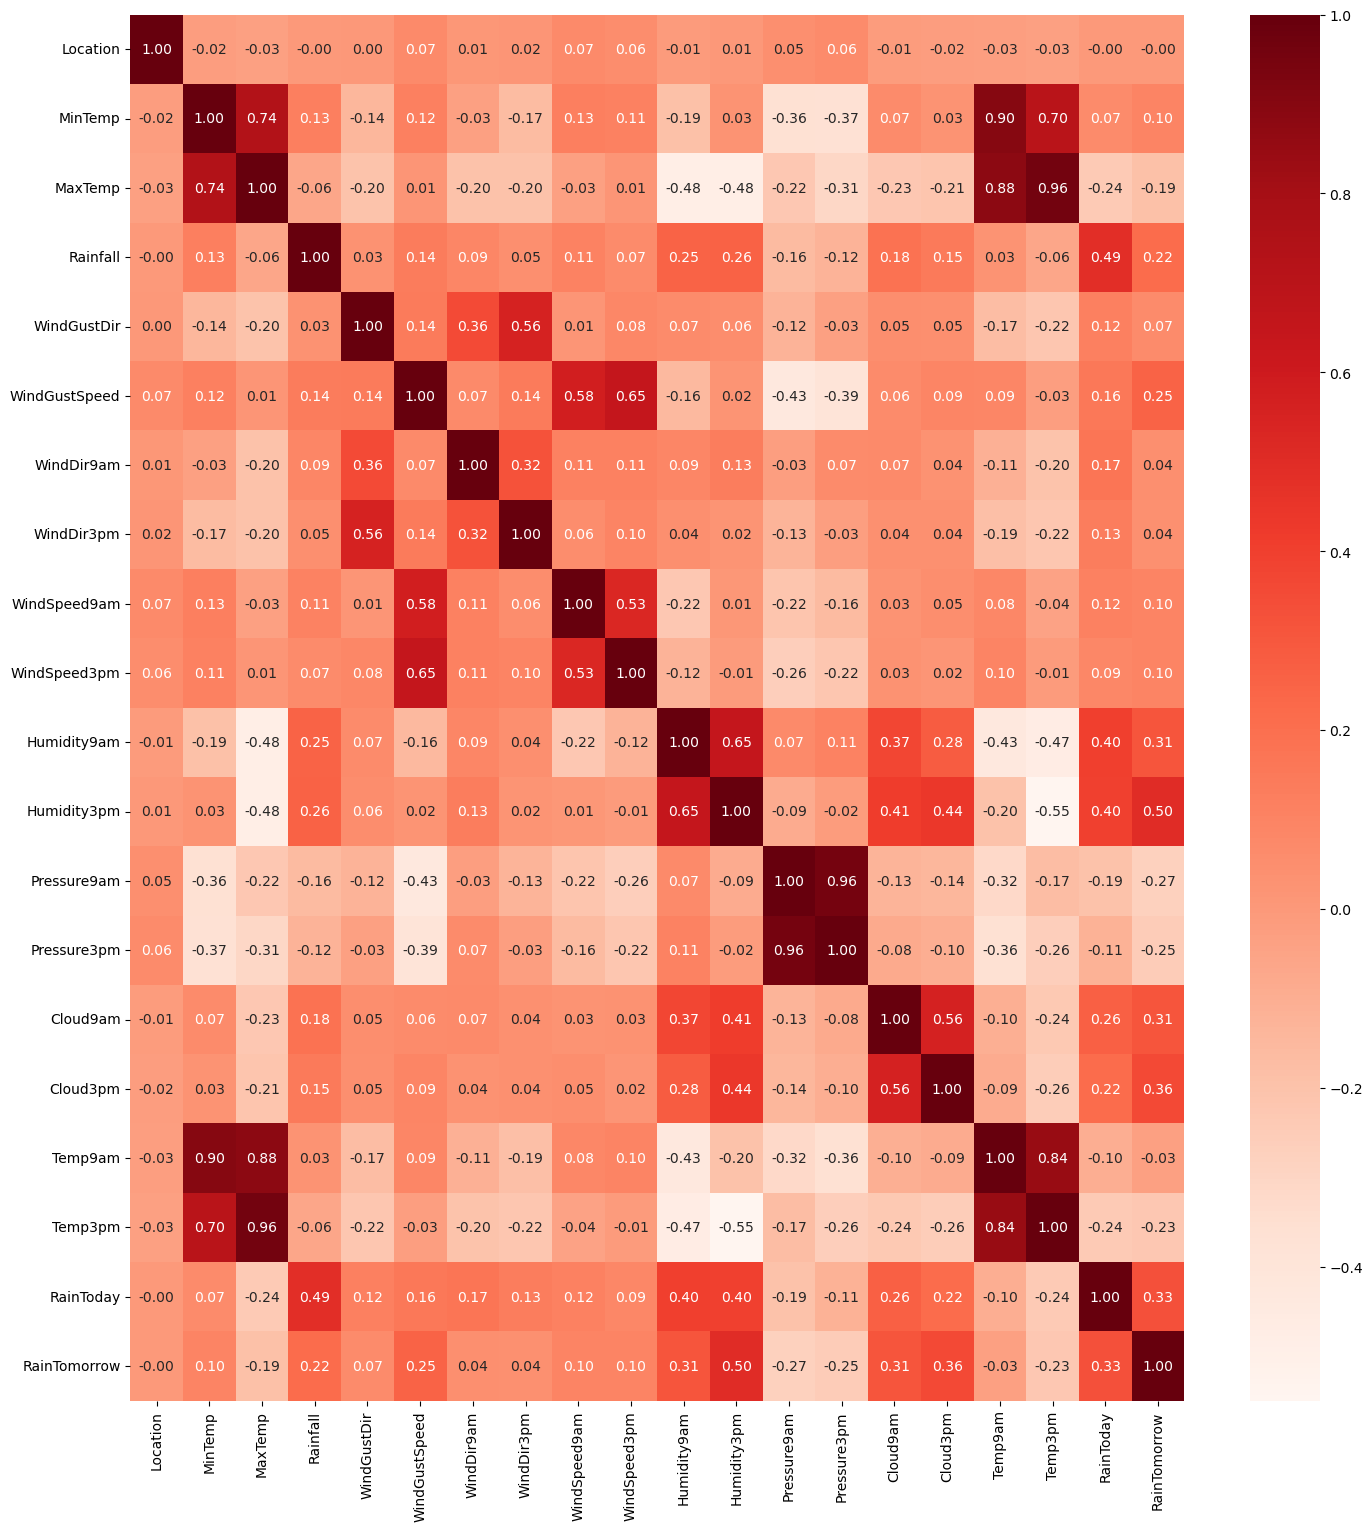

In [30]:
plt.figure(figsize=(17,18))
cor = df_upsampled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

<Axes: xlabel='RainTomorrow', ylabel='count'>

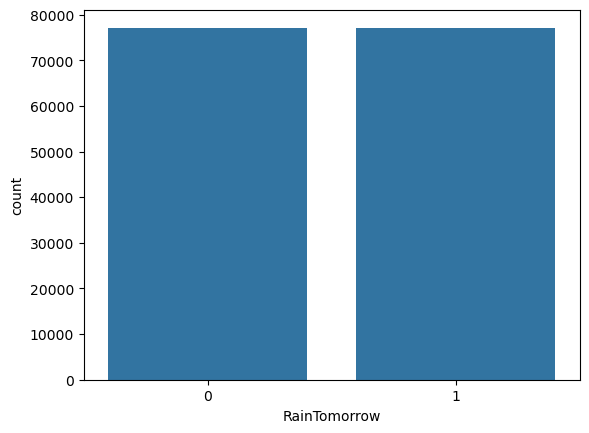

In [31]:
sns.countplot(x=df_upsampled['RainTomorrow'])

**Splitting data for modeling**

In [32]:
X = df_upsampled.drop(columns='RainTomorrow')
y = df_upsampled['RainTomorrow']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=44)

# ML model

**Random Forest**

In [34]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini', max_depth=17, n_estimators=100, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

f1_train = f1_score(y_train, RandomForestClassifierModel.predict(X_train), average='weighted')  # Weighted average for multi-class

print('RandomForestClassifierModel Train F1-score (weighted):', f1_train)

# Calculate F1-score on the test set
f1_test = f1_score(y_test, RandomForestClassifierModel.predict(X_test), average='weighted')  # Weighted average for multi-class

print('RandomForestClassifierModel Test F1-score (weighted):', f1_test)

RandomForestClassifierModel Train Score is :  0.9779064241586383
RandomForestClassifierModel Test Score is :  0.9133207185256228
RandomForestClassifierModel Train F1-score (weighted): 0.9779062945251983
RandomForestClassifierModel Test F1-score (weighted): 0.9132694318577474


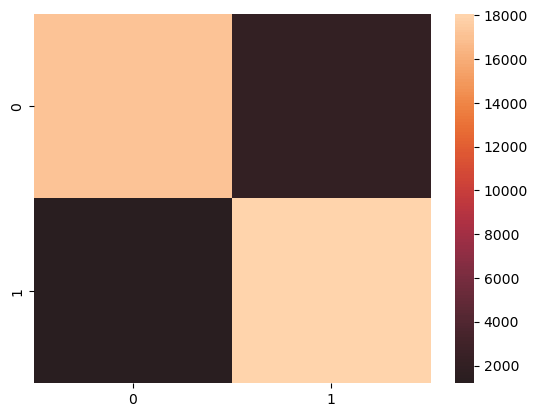

Confusion Matrix is
 [[17161  2154]
 [ 1190 18074]]


In [35]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

**Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression(random_state=44, max_iter=10000)
LogisticRegressionModel.fit(X_train, y_train)

print('LogisticRegressionModel Train Score is : ', LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ', LogisticRegressionModel.score(X_test, y_test))

f1_train = f1_score(y_train, LogisticRegressionModel.predict(X_train), average='weighted')  # Weighted average for multi-class

print('LogisticRegressionModel Train F1-score (weighted):', f1_train)

# Calculate F1-score on the test set
f1_test = f1_score(y_test, LogisticRegressionModel.predict(X_test), average='weighted')  # Weighted average for multi-class

print('LogisticRegressionModel Test F1-score (weighted):', f1_test)

LogisticRegressionModel Train Score is :  0.7765930790167193
LogisticRegressionModel Test Score is :  0.7745405531506778
LogisticRegressionModel Train F1-score (weighted): 0.7765516294967965
LogisticRegressionModel Test F1-score (weighted): 0.7744643684771501


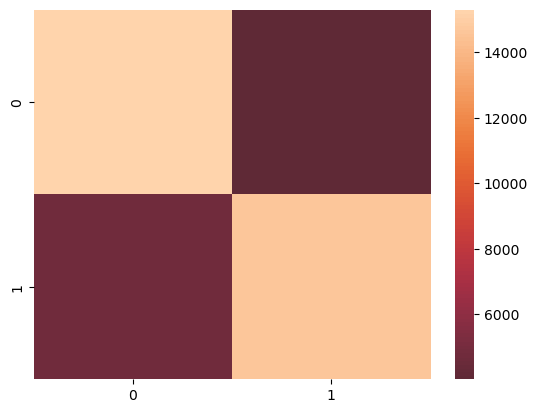

Confusion Matrix is
 [[15308  4007]
 [ 4691 14573]]


In [37]:
y_pred_LR = LogisticRegressionModel.predict(X_test)
CM_LR = confusion_matrix(y_test, y_pred_LR)

sns.heatmap(CM_LR, center=True)
plt.show()

print('Confusion Matrix is\n', CM_LR)

**Support Vector Machine (SVM)**

In [38]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline including StandardScaler and LinearSVC
pipeline = make_pipeline(StandardScaler(), LinearSVC(random_state=44, dual=False))

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
print('SVMModel Train Score is:', pipeline.score(X_train, y_train))
print('SVMModel Test Score is:', pipeline.score(X_test, y_test))

# Tính toán F1-score trên tập huấn luyện
f1_train = f1_score(y_train, pipeline.predict(X_train), average='weighted')

print('SVMModel F1-score trên tập huấn luyện:', f1_train)

# Tính toán F1-score trên tập kiểm tra
f1_test = f1_score(y_test, pipeline.predict(X_test), average='weighted')

print('SVMModel F1-score trên tập kiểm tra:', f1_test)

SVMModel Train Score is: 0.7754784637318011
SVMModel Test Score is: 0.7738147696933565
SVMModel F1-score trên tập huấn luyện: 0.7754047060023109
SVMModel F1-score trên tập kiểm tra: 0.7736972507668459


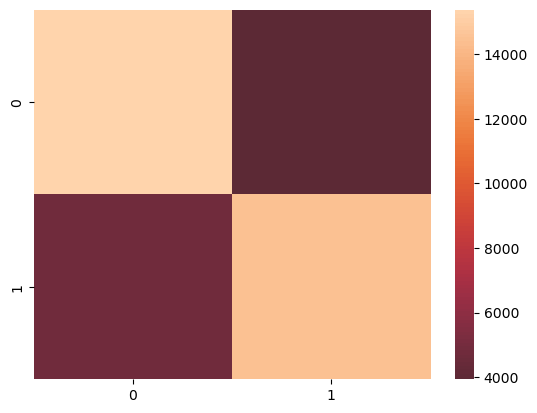

Confusion Matrix is
 [[15379  3936]
 [ 4790 14474]]


In [39]:
y_pred_SVM = pipeline.predict(X_test)
CM_SVM = confusion_matrix(y_test, y_pred_SVM)

sns.heatmap(CM_SVM, center=True)
plt.show()

print('Confusion Matrix is\n', CM_SVM)

**K-Nearest Neighbors (KNN)**

In [48]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Chuyển đổi X_train và X_test thành mảng numpy với thứ tự C-contiguous
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

KNNModel = KNeighborsClassifier(n_neighbors=1)
KNNModel.fit(X_train, y_train)

print('KNNModel Train Score is : ', KNNModel.score(X_train, y_train))
print('KNNModel Test Score is : ', KNNModel.score(X_test, y_test))

f1_train = f1_score(y_train, KNNModel.predict(X_train), average='weighted')  # Weighted average for multi-class

print('KNNModel Train F1-score (weighted):', f1_train)

# Calculate F1-score on the test set
f1_test = f1_score(y_test, KNNModel.predict(X_test), average='weighted')  # Weighted average for multi-class

print('KNNModel Test F1-score (weighted):', f1_test)

KNNModel Train Score is :  0.9998358318572601
KNNModel Test Score is :  0.9138650561186138
KNNModel Train F1-score (weighted): 0.9998358318647119
KNNModel Test F1-score (weighted): 0.9136260767355409


In [49]:
#cross-validation
from sklearn.model_selection import cross_val_score

#knn = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(KNNModel, X_train, y_train, cv=10)
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Cross-Validation Scores: [0.9062554  0.9063418  0.90288578 0.90193537 0.89917055 0.9030502
 0.90607448 0.90235894 0.90166767 0.90270457]
Mean Cross-Validation Score: 0.9032444777593869


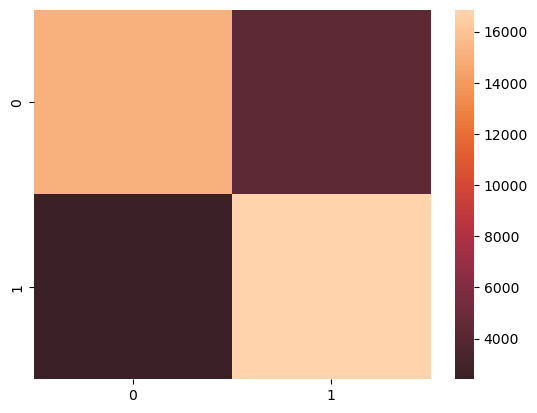

Confusion Matrix is
 [[14994  4321]
 [ 2409 16855]]


In [41]:
y_pred_KNN = KNNModel.predict(X_test)
CM_KNN = confusion_matrix(y_test, y_pred_KNN)

sns.heatmap(CM_KNN, center=True)
plt.show()

print('Confusion Matrix is\n', CM_KNN)

**Gradient Boosting**

In [42]:
GBCModel = GradientBoostingClassifier(n_estimators=200, max_depth=11, learning_rate=0.07, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

f1_train = f1_score(y_train, GBCModel.predict(X_train), average='weighted')  # Weighted average for multi-class

print('GBCModel Train F1-score (weighted):', f1_train)

# Calculate F1-score on the test set
f1_test = f1_score(y_test, GBCModel.predict(X_test), average='weighted')  # Weighted average for multi-class

print('GBCModel Test F1-score (weighted):', f1_test)

GBCModel Train Score is :  0.9934073530047091
GBCModel Test Score is :  0.9260219290287462
GBCModel Train F1-score (weighted): 0.9934073516974595
GBCModel Test F1-score (weighted): 0.9259408840208948


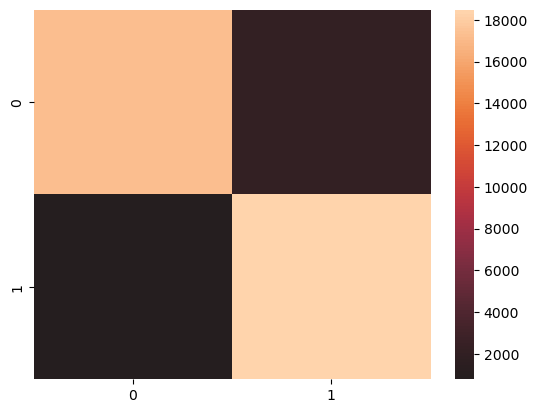

Confusion Matrix is
 [[17237  2078]
 [  776 18488]]


In [43]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

# Test data predicting

In [44]:
y_pred = RandomForestClassifierModel.predict(test)

<Axes: ylabel='count'>

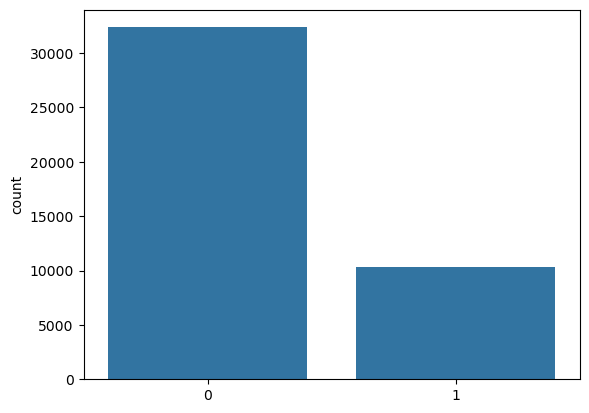

In [45]:
sns.countplot(x=y_pred)

In [46]:
test_dt = pd.read_csv('kaggle/input/australia-weather-data/Weather Test Data.csv')
submission = test_dt[["row ID"]]
submission["RainTomorrow"] = y_pred

C:\Users\user\AppData\Local\Temp\ipykernel_2040\422442147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["RainTomorrow"] = y_pred


In [47]:
submission.to_csv('kaggle/output/predict_weather_RF.csv', index=False)